<h3 style="color:#C0C0C0;text-align:center;font-size: smaller;">Applied Machine Learning and Data Mining - U26538</h3>

<br>
<h1 style="color:#800080;text-align:center;"> Practical Worksheet (16)</h1>
<h2 style="color:#800080;text-align:center;">K-means clustering (Unlabelled Dataset)
</h2>

<h3 b> Introduction </h3>

In the following practical worksheet, you will learn how to use the K-means clustering algorithm and how to implement cluster evaluation for the labelled datasets. If you have any questions please ask for assistance during the session and you can also email me if you have any further questions <u> alaa.mohasseb@port.ac.uk</u>. 

<u>Dataset</u>

Mall Customers dataset will be used for the prediction of different customers using k-Mean Clustering. The Dataset contains five attributes and 200 instances. The attributes are Customer ID, Gender (male/female), the Age which is between 19 to 70 of different customers, Annual Income in k$ and Spending Score.  (Download the dataset from your moodle page).

The <i>objective of the clustering</i> is to create a group of clusters and label them based on the customers' spending habits the Annual Income and Spending Score will be used as features as they are the best factors to determine the segments of a customer.

<u>Import the Libraries</u>

In a new Jupyter Notebook (practWeek16), load the NumPy, pandas and matplotlib libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
#this will make your plot outputs appear and be stored within the notebook

<u>Read External Data</u> (mall dataset)
<ul>
<li>Download the dataset from your moodle page.</li>
<li>Upload the dataset to your Jupyter dashboard.</li>
<li>To read an external data (csv file) use the following command:</li>
</ul>

In [ ]:
dataset=pd.read_csv('mallcustomers.csv')
X=dataset.iloc[:, [3,4]].values

In [ ]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<u>Data understanding and Exploration</u>

To understand the dataset, analysis should be done and some information needs to be explored such as:

- The Attributes
- Data Shape
- Data Description
- Data Information
- Data Type

In [ ]:
dataset.keys() #Print the attributes

Index([u'CustomerID', u'Genre', u'Age', u'Annual Income (k$)',
       u'Spending Score (1-100)'],
      dtype='object')

In [ ]:
dataset.describe() #Data description

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
dataset.dtypes #Data Type

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<u>Find the optimal number of clusters</u>

Using the elbow method to find the optimal number of clusters

In [ ]:
# import kMean from sklean
from sklearn.cluster import KMeans

<function matplotlib.pyplot.show>

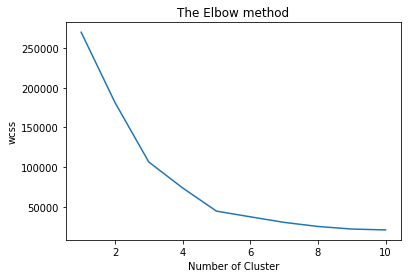

In [ ]:
# plot elbow method graph
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show

<u>Build the Machine learning Model</u>

<b>K-Means</b>

Apply K-Means to the mall dataset and Visualising the Clusters. We will select 5 as the number of clusters.

- <code>n_clusters:</code> The number of clusters to form as well as the number of centroids to generate.
- <code>max_iterint, default=300</code>: Maximum number of iterations of the k-means algorithm for a single run.

- <code>n_init‘auto’ or int, default=10</code>: Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia. Several runs are recommended for sparse high-dimensional problems.

<u>Note:</u> When n_init='auto', the number of runs will be 10 if using init='random', and 1 if using init='kmeans++'.
- <code>random_state</code>: RandomState instance or None, default=None. Determines random number generation for centroid initialization

In [ ]:
# apply the cluster method
kmeans = KMeans(n_clusters= 5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
# predict the cluster
y_kmeans = kmeans.fit_predict(X)

In [ ]:
# print the centroids points
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 86.53846154  82.12820513]
 [ 55.2962963   49.51851852]
 [ 88.2         17.11428571]
 [ 26.30434783  20.91304348]
 [ 25.72727273  79.36363636]]


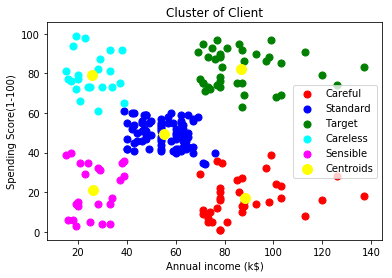

In [ ]:
# Visualizing the five Clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=50, c='magenta', label = 'Sensible')
# apply centroid for all cluster
plt.scatter(kmeans.cluster_centers_[:, 0] , kmeans.cluster_centers_[:, 1] , s=100, c='yellow', label = 'Centroids')
plt.title('Cluster of Client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

<u>Assign the clusters group</li>

In [ ]:
from pandas import Series, DataFrame
dataset['cluster group'] = Series(y_kmeans, index=dataset.index)
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


In [ ]:
# print number of instances in each cluster group
dataset['cluster group'].value_counts()

1    81
2    39
0    35
4    23
3    22
Name: cluster group, dtype: int64

<u>Cluster Evaluation</u>

<b>Silhouette coefficient </b>

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans
# import dataset
dataset=pd.read_csv('mallcustomers.csv')
X=dataset.iloc[:, [3,4]].values

kmeans_model = KMeans(n_clusters = 5, random_state = 1).fit(X)
labels = kmeans_model.labels_
silhouette_score(X, labels, metric = 'euclidean')

0.55393199744464805

<b>Silhouette coefficient graph </b>

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.29689691625
For n_clusters = 3 The average silhouette_score is : 0.467613581588
For n_clusters = 4 The average silhouette_score is : 0.493196310925
For n_clusters = 5 The average silhouette_score is : 0.553931997445
For n_clusters = 6 The average silhouette_score is : 0.537967558562
For n_clusters = 7 The average silhouette_score is : 0.526428370369
For n_clusters = 8 The average silhouette_score is : 0.457043846336


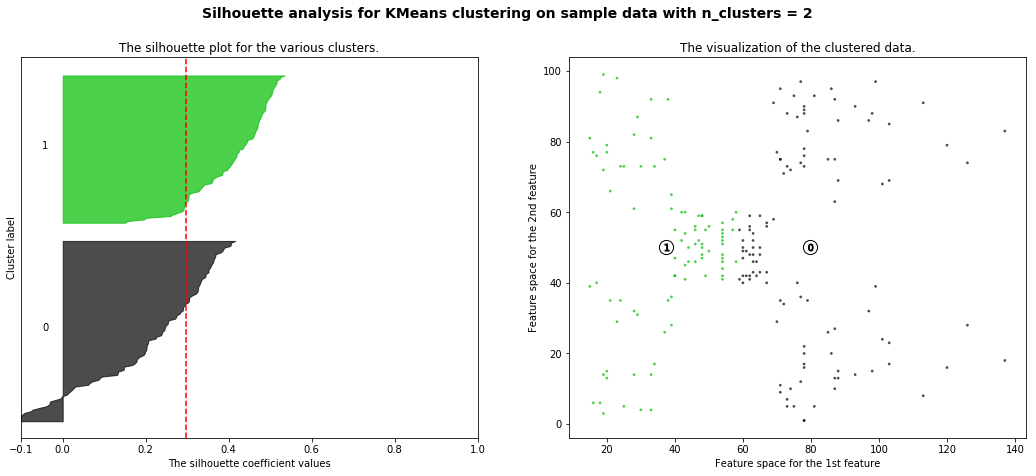

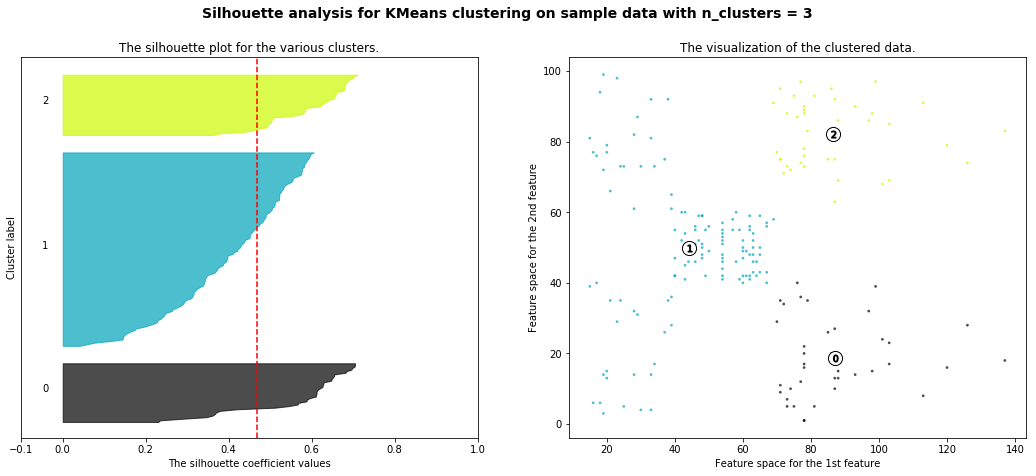

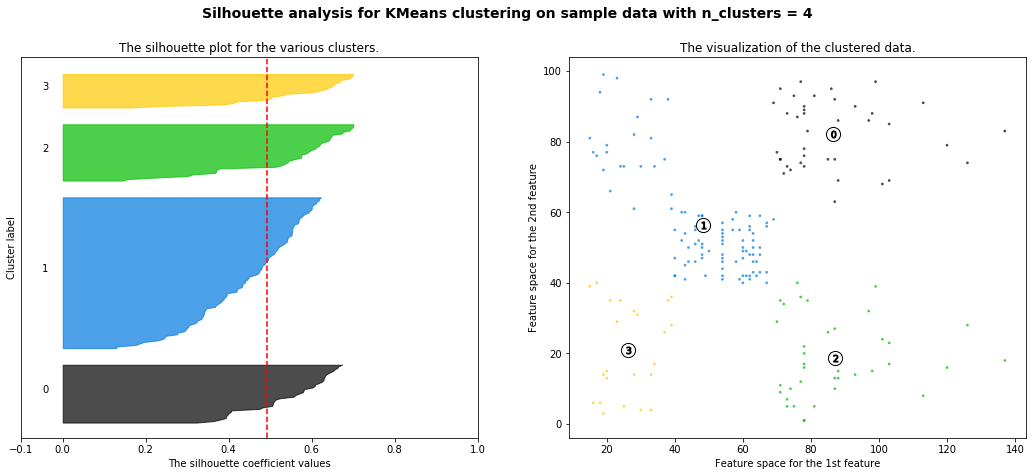

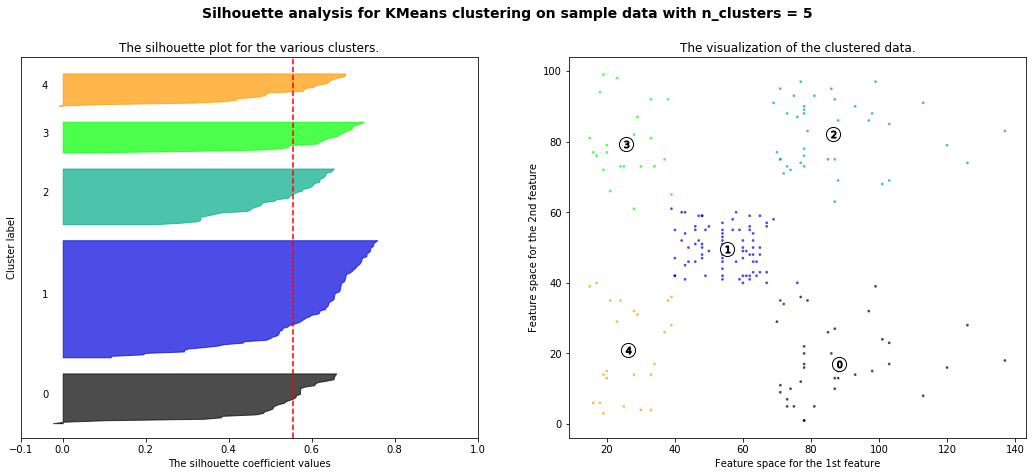

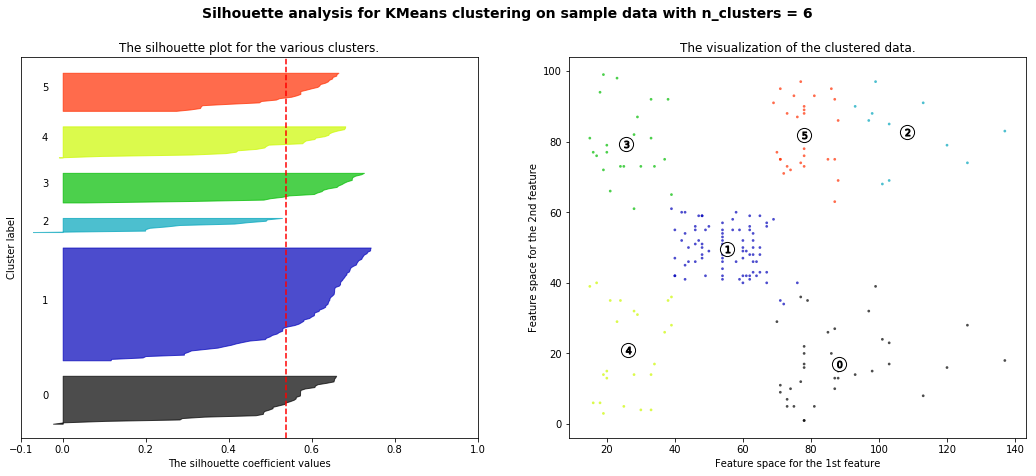

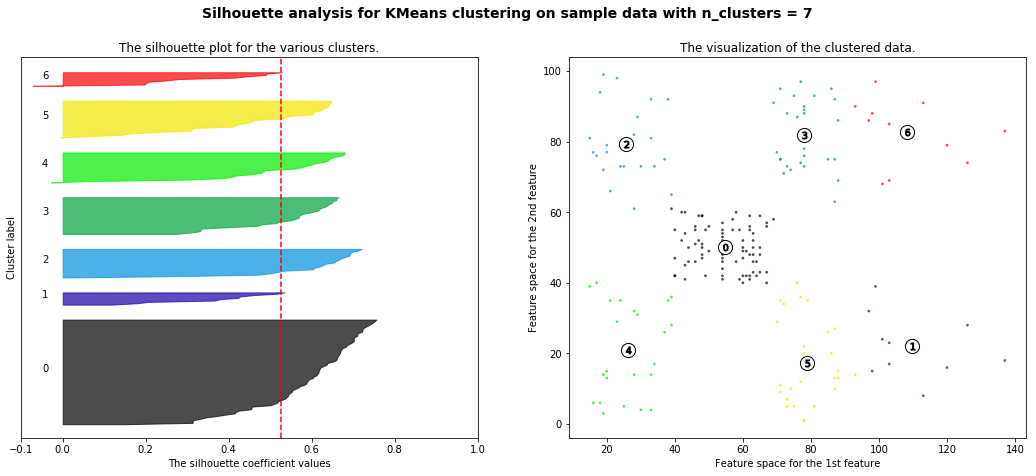

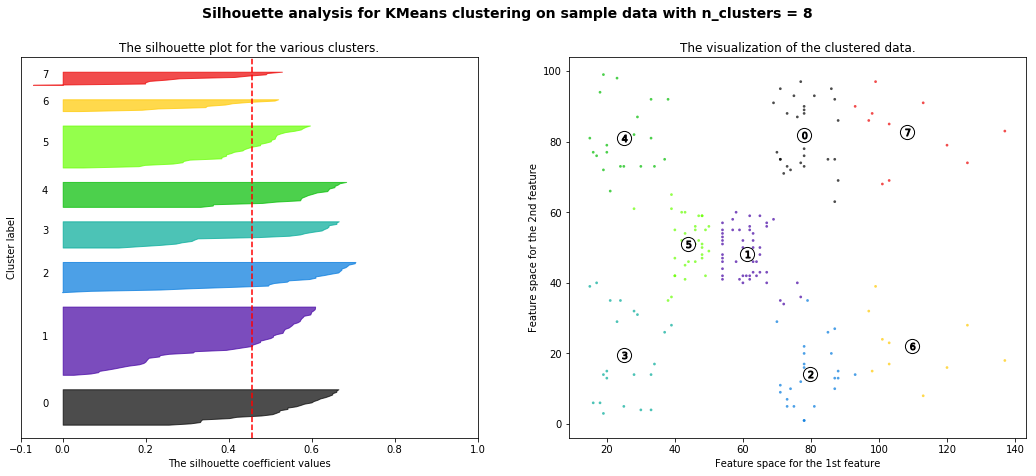

In [ ]:
# plot silhouette coefficient method graph
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                 n_features=2,
                 centers=4,
                 cluster_std=1,
                 center_box=(-10.0, 10.0),
                 shuffle=True,
                 random_state=0)  
range_n_clusters = [2, 3, 4, 5, 6,7,8]
X=dataset.iloc[:, [3,4]].values
for n_clusters in range_n_clusters:
   # Create a subplot with 1 row and 2 columns
   fig, (ax1, ax2) = plt.subplots(1, 2)
   fig.set_size_inches(18, 7)

   # The 1st subplot is the silhouette plot
   # The silhouette coefficient can range from -1, 1 but in this example all
   # lie within [-0.1, 1]
   ax1.set_xlim([-0.1, 1])
   # The (n_clusters+1)*10 is for inserting blank space between silhouette
   # plots of individual clusters, to demarcate them clearly.
   ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

   # Initialize the cluster with n_clusters value and a random generator
   # seed of 10 for reproducibility.
   cluster = KMeans(n_clusters=n_clusters, random_state=0)
   cluster_labels = cluster.fit_predict(X)

   # The silhouette_score gives the average value for all the samples.
   # This gives a perspective into the density and separation of the formed
   # clusters
   silhouette_avg = silhouette_score(X, cluster_labels)
   print("For n_clusters =", n_clusters,
         "The average silhouette_score is :", silhouette_avg)

   # Compute the silhouette scores for each sample
   sample_silhouette_values = silhouette_samples(X, cluster_labels)

   y_lower = 10
   for i in range(n_clusters):
       # Aggregate the silhouette scores for samples belonging to
       # cluster i, and sort them
       ith_cluster_silhouette_values = \
           sample_silhouette_values[cluster_labels == i]

       ith_cluster_silhouette_values.sort()

       size_cluster_i = ith_cluster_silhouette_values.shape[0]
       y_upper = y_lower + size_cluster_i

       color = cm.nipy_spectral(float(i) / n_clusters)
       ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
       # Label the silhouette plots with their cluster numbers at the middle
       ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

       # Compute the new y_lower for next plot
       y_lower = y_upper + 10  # 10 for the 0 samples

   ax1.set_title("The silhouette plot for the various clusters.")
   ax1.set_xlabel("The silhouette coefficient values")
   ax1.set_ylabel("Cluster label")

   # The vertical line for average silhouette score of all the values
   ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

   ax1.set_yticks([])  # Clear the yaxis labels / ticks
   ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   # 2nd Plot showing the actual clusters formed
   colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
   ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
               c=colors, edgecolor='k')

   # Labeling the clusters
   centers = cluster.cluster_centers_
   # Draw white circles at cluster centers
   ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
               c="white", alpha=1, s=200, edgecolor='k')

   for i, c in enumerate(centers):
       ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                   s=50, edgecolor='k')

   ax2.set_title("The visualization of the clustered data.")
   ax2.set_xlabel("Feature space for the 1st feature")
   ax2.set_ylabel("Feature space for the 2nd feature")
   plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                 "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')
plt.show()